# Análisis EDA dataset Ticdata2000
## Autor: Jose Antonio Nazar Aláez

## Objetivo del análisis

El objetivo de este trabajo es el de realizar un análisis exploratorio sobre un dataset que nos aporta información acerca de una serie de atributos pertenecientes a diversos consumidores con el fin de predecir los consumidores que comprarán un seguro de autocaravana

### Librerias

In [1]:
#Librerias necesarias para el análisis
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.impute import KNNImputer
import scipy.stats as ss
import warnings

In [2]:
#funciones
def plot_feature(df, col_name, isContinuous, target):
    """
    Visualize a variable with and without faceting on the loan status.
    - df dataframe
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    count_null = df[col_name].isnull().sum()
    if isContinuous:
        
        sns.histplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(col_name)
    ax1.set_ylabel('Count')
    ax1.set_title(col_name)
    plt.xticks(rotation = 90)


    if isContinuous:
        sns.boxplot(x=col_name, y=target, data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(col_name + ' by '+target)
    else:
        data = df.groupby(col_name)[target].value_counts(normalize=True).to_frame('proportion').reset_index() 
        data.columns = [i, target, 'proportion']
        #sns.barplot(x = col_name, y = 'proportion', hue= target, data = data, saturation=1, ax=ax2)
        sns.barplot(x = col_name, y = 'proportion', hue= target, data = data, saturation=1, ax=ax2)
        ax2.set_ylabel(target)
        ax2.set_title(target)
        plt.xticks(rotation = 90)
    ax2.set_xlabel(col_name)
    
    plt.tight_layout()


    


def get_corr_matrix(dataset = None, metodo='pearson', size_figure=[10,8]):
    # Para obtener la correlación de Spearman, sólo cambiar el metodo por 'spearman'

    if dataset is None:
        print(u'\nHace falta pasar argumentos a la función')
        return 1
    sns.set(style="white")
    # Compute the correlation matrix
    corr = dataset.corr(method=metodo) 
    # Set self-correlation to zero to avoid distraction
    for i in range(corr.shape[0]):
        corr.iloc[i, i] = 0
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=size_figure)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, center=0,
                square=True, linewidths=.5,  cmap ='viridis' ) #cbar_kws={"shrink": .5}
    plt.show()
    
    return 0

    


### Lectura de archivos y visión del dataframe

In [3]:
#Lectura de archivos. En principio para el análisis EDA solo utilizaré el train, pero leo el resto por si al final
#tengo que usar el test
path_folder = "C:/Users/josea_000/Documents/aprendizaje automatico/practica_EDA/data/raw/"
traindata = pd.read_table(path_folder +"ticdata2000.txt", header=None)
prediction = pd.read_table(path_folder +"ticeval2000.txt", header=None)
test = pd.read_table(path_folder +"tictgts2000.txt", header=None)

In [4]:
#Añado los nombres de las columnas al conjunto de datos ticdata2000.txt

traindata.columns = columns = ['MOSTYPE','MAANTHUI','MGEMOMV','MGEMLEEF','MOSHOOFD','MGODRK','MGODPR','MGODOV','MGODGE','MRELGE','MRELSA','MRELOV',
             'MFALLEEN','MFGEKIND','MFWEKIND','MOPLHOOG','MOPLMIDD','MOPLLAAG','MBERHOOG','MBERZELF','MBERBOER','MBERMIDD',
             'MBERARBG','MBERARBO','MSKA','MSKB1','MSKB2','MSKC','MSKD','MHHUUR','MHKOOP','MAUT1','MAUT2','MAUT0','MZFONDS',
             'MZPART','MINKM30','MINK3045','MINK4575','MINK7512','MINK123M','MINKGEM','MKOOPKLA','PWAPART','PWABEDR','PWALAND',
             'PPERSAUT','PBESAUT','PMOTSCO','PVRAAUT','PAANHANG','PTRACTOR','PWERKT','PBROM','PLEVEN','PPERSONG','PGEZONG',
             'PWAOREG','PBRAND','PZEILPL','PPLEZIER','PFIETS','PINBOED','PBYSTAND','AWAPART','AWABEDR','AWALAND','APERSAUT',
             'ABESAUT','AMOTSCO','AVRAAUT','AAANHANG','ATRACTOR','AWERKT','ABROM','ALEVEN','APERSONG','AGEZONG','AWAOREG',
             'ABRAND','AZEILPL','APLEZIER','AFIETS','AINBOED','ABYSTAND','CARAVAN']


In [5]:
#muestro las 5 primeras filas de train
traindata.head()

MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR  MGODOV  \
0       33         1        3         2         8       0       5       1   
1       37         1        2         2         8       1       4       1   
2       37         1        2         2         8       0       4       2   
3        9         1        3         3         3       2       3       2   
4       40         1        4         2        10       1       4       1   

   MGODGE  MRELGE  ...  APERSONG  AGEZONG  AWAOREG  ABRAND  AZEILPL  APLEZIER  \
0       3       7  ...         0        0        0       1        0         0   
1       4       6  ...         0        0        0       1        0         0   
2       4       3  ...         0        0        0       1        0         0   
3       4       5  ...         0        0        0       1        0         0   
4       4       7  ...         0        0        0       1        0         0   

   AFIETS  AINBOED  ABYSTAND  CARAVAN  
0       0        0         0        0  
1       0        0         0        0  
2       0        0         0        0  
3       0        0         0        0  
4       0        0         0        0  

[5 rows x 86 columns]

In [6]:
pd.DataFrame(list(traindata) ,columns = ['Columnas'])

Columnas
0    MOSTYPE
1   MAANTHUI
2    MGEMOMV
3   MGEMLEEF
4   MOSHOOFD
..       ...
81  APLEZIER
82    AFIETS
83   AINBOED
84  ABYSTAND
85   CARAVAN

[86 rows x 1 columns]

Para este análisis no tendré en cuenta la columna correspondiente al id ya que considero que no aportará información relevante para este estudio.

### Análisis general de la tabla

In [7]:
#veo la dimensión con y sin duplicados para tener una visión general
print(traindata.shape, traindata.drop_duplicates().shape)

(5822, 86) (5220, 86)


In [8]:
#Tipos de datos
traindata.dtypes.to_dict()

{'MOSTYPE': dtype('int64'),
 'MAANTHUI': dtype('int64'),
 'MGEMOMV': dtype('int64'),
 'MGEMLEEF': dtype('int64'),
 'MOSHOOFD': dtype('int64'),
 'MGODRK': dtype('int64'),
 'MGODPR': dtype('int64'),
 'MGODOV': dtype('int64'),
 'MGODGE': dtype('int64'),
 'MRELGE': dtype('int64'),
 'MRELSA': dtype('int64'),
 'MRELOV': dtype('int64'),
 'MFALLEEN': dtype('int64'),
 'MFGEKIND': dtype('int64'),
 'MFWEKIND': dtype('int64'),
 'MOPLHOOG': dtype('int64'),
 'MOPLMIDD': dtype('int64'),
 'MOPLLAAG': dtype('int64'),
 'MBERHOOG': dtype('int64'),
 'MBERZELF': dtype('int64'),
 'MBERBOER': dtype('int64'),
 'MBERMIDD': dtype('int64'),
 'MBERARBG': dtype('int64'),
 'MBERARBO': dtype('int64'),
 'MSKA': dtype('int64'),
 'MSKB1': dtype('int64'),
 'MSKB2': dtype('int64'),
 'MSKC': dtype('int64'),
 'MSKD': dtype('int64'),
 'MHHUUR': dtype('int64'),
 'MHKOOP': dtype('int64'),
 'MAUT1': dtype('int64'),
 'MAUT2': dtype('int64'),
 'MAUT0': dtype('int64'),
 'MZFONDS': dtype('int64'),
 'MZPART': dtype('int64'),
 'MINK

Vemos que reconoce todas las variables como numéricas

In [9]:
traindata.select_dtypes('int64').nunique()

MOSTYPE     40
MAANTHUI     9
MGEMOMV      5
MGEMLEEF     6
MOSHOOFD    10
            ..
APLEZIER     3
AFIETS       4
AINBOED      3
ABYSTAND     3
CARAVAN      2
Length: 86, dtype: int64

Se observa el número de variables distintas para cada columna de carácter int64 y vemos como hay variables con distintos valores

Debido a los resultados del análisis general (todas las variables se reconocen como numéricas y existen varios valores para cada columna) reviso las variables y veo que hay varias variables categóricas por lo que más adelante las tendré que clasificar individualmente

### Exploración variable objetivo y tratamiento

In [10]:
#Veo la distribución de los valores de la variable objetivo
pd_plot_CARAVAN = traindata['CARAVAN']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

pd_plot_CARAVAN_conteo = traindata['CARAVAN'].value_counts().reset_index()
pd_plot_CARAVAN_pc = pd.merge(pd_plot_CARAVAN, pd_plot_CARAVAN_conteo, on=['index'], how='inner')
pd_plot_CARAVAN_pc


index    percent  CARAVAN
0      0  94.022673     5474
1      1   5.977327      348

In [11]:
fig = px.histogram(pd_plot_CARAVAN_pc, x="index", y=['percent'])
fig.show()


Vemos que los valores de la variable objetivo no están balanceados y existe un claro desequilibrio al tener un gran
porcentaje (94%) con valor 0

### Nulos

In [12]:
#Recordamos la dimensión del dataset para comparar y ver si existen nulos
traindata.shape

(5822, 86)

In [13]:
#Veo el número de nulos por filas y por columnas
pd_series_null_columns = traindata.isnull().sum().sort_values(ascending=False)
pd_series_null_rows = traindata.isnull().sum(axis=1).sort_values(ascending=False)
print(pd_series_null_columns.shape, pd_series_null_rows.shape)


(86,) (5822,)


Como la dimensión del data set coincide no parece que haya nulos. No obstante, a continuación realizo otra comprobación
por filas y columnas

In [14]:
#comprobación nulos
pd_null_columnas = pd.DataFrame(pd_series_null_columns, columns=['nulos_columnas'])     
pd_null_filas = pd.DataFrame(pd_series_null_rows, columns=['nulos_filas'])  
pd_null_filas['target'] = traindata['CARAVAN'].copy()
pd_null_columnas['porcentaje_columnas'] = pd_null_columnas['nulos_columnas']/traindata.shape[0]
pd_null_filas['porcentaje_filas']= pd_null_filas['nulos_filas']/traindata.shape[1]

In [15]:
#nulos por columnas
pd_null_columnas

nulos_columnas  porcentaje_columnas
MOSTYPE                0                  0.0
PLEVEN                 0                  0.0
PINBOED                0                  0.0
PFIETS                 0                  0.0
PPLEZIER               0                  0.0
...                  ...                  ...
MSKC                   0                  0.0
MSKB2                  0                  0.0
MSKB1                  0                  0.0
MSKA                   0                  0.0
CARAVAN                0                  0.0

[86 rows x 2 columns]

In [16]:
#nulos por filas
pd_null_filas

nulos_filas  target  porcentaje_filas
0               0       0               0.0
3888            0       0               0.0
3886            0       0               0.0
3885            0       0               0.0
3884            0       0               0.0
...           ...     ...               ...
1939            0       0               0.0
1938            0       0               0.0
1937            0       0               0.0
1936            0       0               0.0
5821            0       0               0.0

[5822 rows x 3 columns]

In [17]:
#también se pueden ver los nulos con la función info()
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 86 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   MOSTYPE   5822 non-null   int64
 1   MAANTHUI  5822 non-null   int64
 2   MGEMOMV   5822 non-null   int64
 3   MGEMLEEF  5822 non-null   int64
 4   MOSHOOFD  5822 non-null   int64
 5   MGODRK    5822 non-null   int64
 6   MGODPR    5822 non-null   int64
 7   MGODOV    5822 non-null   int64
 8   MGODGE    5822 non-null   int64
 9   MRELGE    5822 non-null   int64
 10  MRELSA    5822 non-null   int64
 11  MRELOV    5822 non-null   int64
 12  MFALLEEN  5822 non-null   int64
 13  MFGEKIND  5822 non-null   int64
 14  MFWEKIND  5822 non-null   int64
 15  MOPLHOOG  5822 non-null   int64
 16  MOPLMIDD  5822 non-null   int64
 17  MOPLLAAG  5822 non-null   int64
 18  MBERHOOG  5822 non-null   int64
 19  MBERZELF  5822 non-null   int64
 20  MBERBOER  5822 non-null   int64
 21  MBERMIDD  5822 non-null   int64
 22  

No hay nulos

### Variables categóricas y numéricas

Una vez analizadas cada una de la variables de la tabla y comprender su descripción y significado, determinamos las variables categoricas y las variables numéricas.


In [18]:
#Tipos de datos
traindata.dtypes.to_dict()

{'MOSTYPE': dtype('int64'),
 'MAANTHUI': dtype('int64'),
 'MGEMOMV': dtype('int64'),
 'MGEMLEEF': dtype('int64'),
 'MOSHOOFD': dtype('int64'),
 'MGODRK': dtype('int64'),
 'MGODPR': dtype('int64'),
 'MGODOV': dtype('int64'),
 'MGODGE': dtype('int64'),
 'MRELGE': dtype('int64'),
 'MRELSA': dtype('int64'),
 'MRELOV': dtype('int64'),
 'MFALLEEN': dtype('int64'),
 'MFGEKIND': dtype('int64'),
 'MFWEKIND': dtype('int64'),
 'MOPLHOOG': dtype('int64'),
 'MOPLMIDD': dtype('int64'),
 'MOPLLAAG': dtype('int64'),
 'MBERHOOG': dtype('int64'),
 'MBERZELF': dtype('int64'),
 'MBERBOER': dtype('int64'),
 'MBERMIDD': dtype('int64'),
 'MBERARBG': dtype('int64'),
 'MBERARBO': dtype('int64'),
 'MSKA': dtype('int64'),
 'MSKB1': dtype('int64'),
 'MSKB2': dtype('int64'),
 'MSKC': dtype('int64'),
 'MSKD': dtype('int64'),
 'MHHUUR': dtype('int64'),
 'MHKOOP': dtype('int64'),
 'MAUT1': dtype('int64'),
 'MAUT2': dtype('int64'),
 'MAUT0': dtype('int64'),
 'MZFONDS': dtype('int64'),
 'MZPART': dtype('int64'),
 'MINK

Vemos que reconoce todas las variables como numéricas, pero si analizamos algunas vemos que hay categóricas por lo que 
las clasifico individualmente

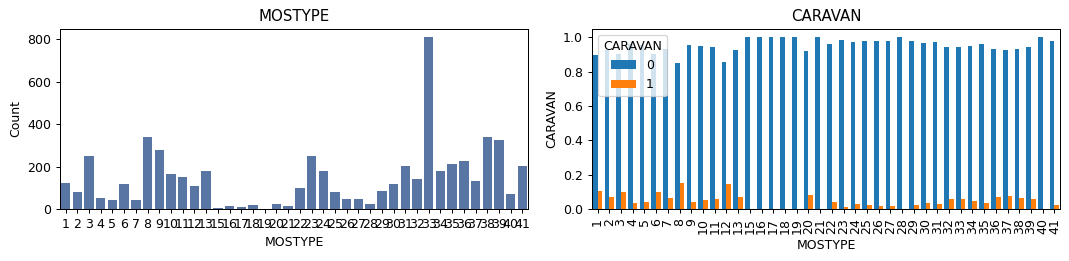

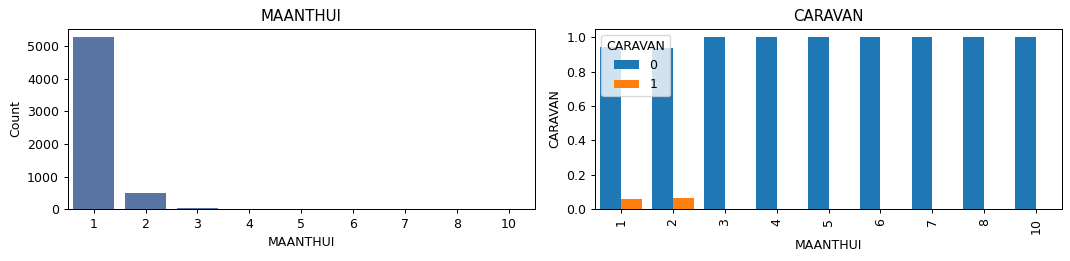

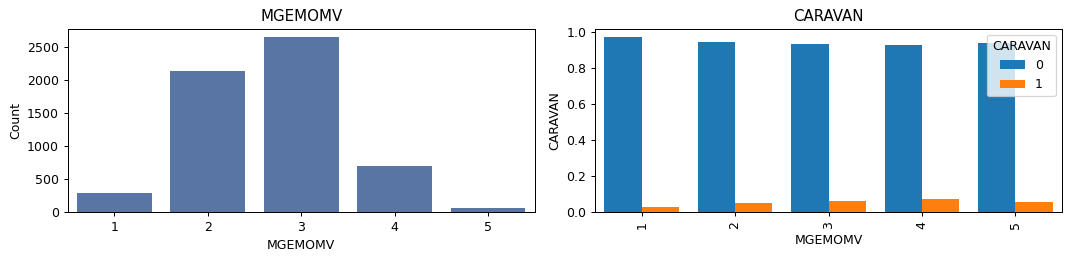

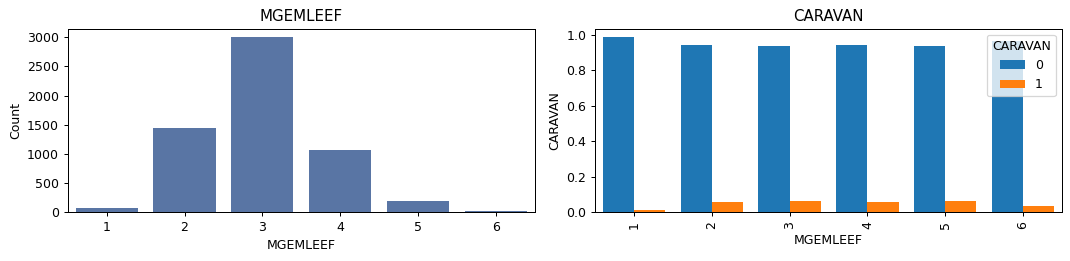

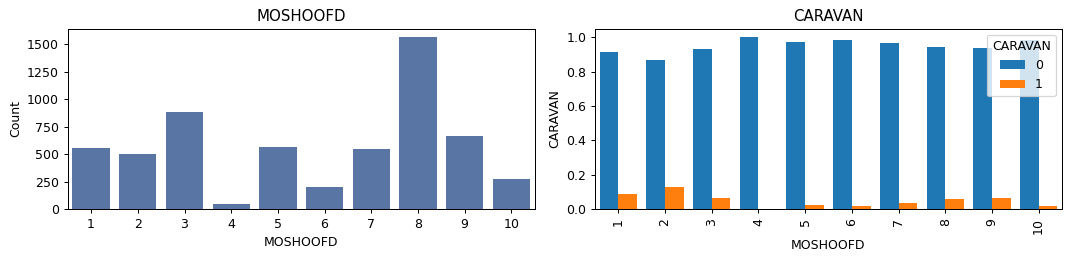

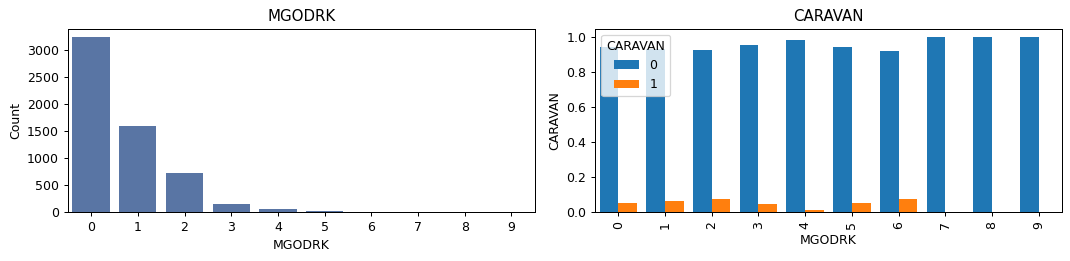

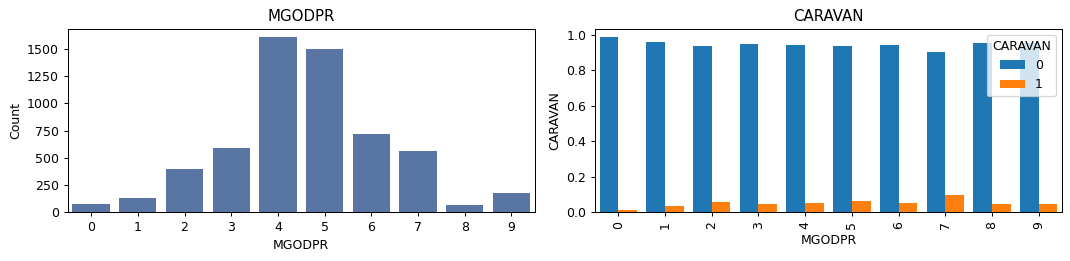

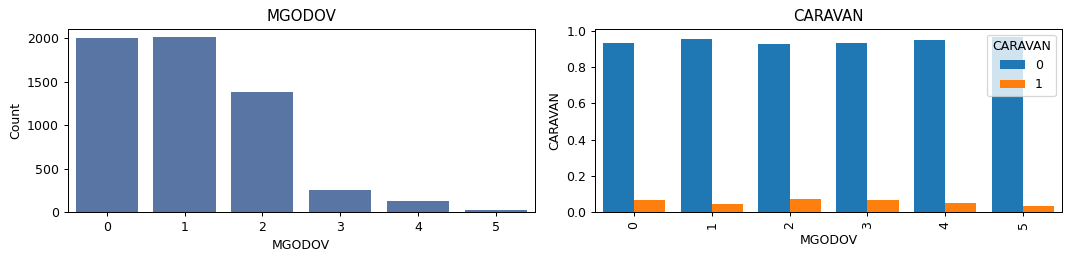

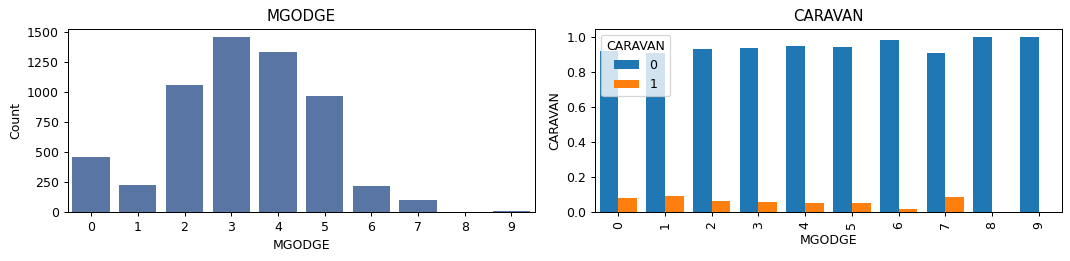

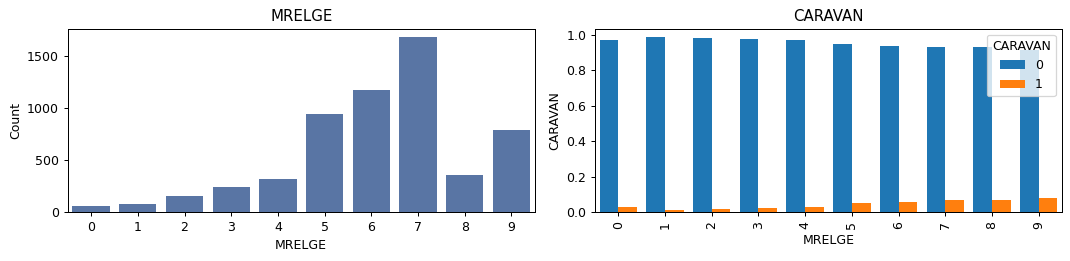

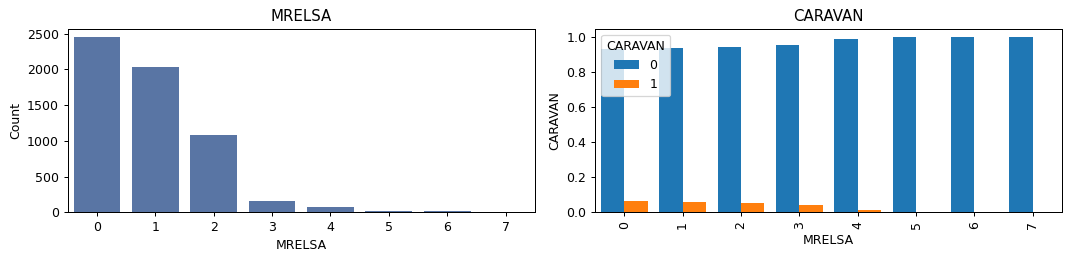

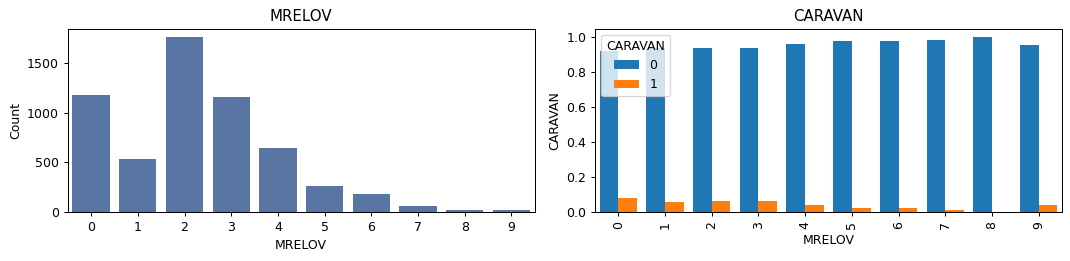

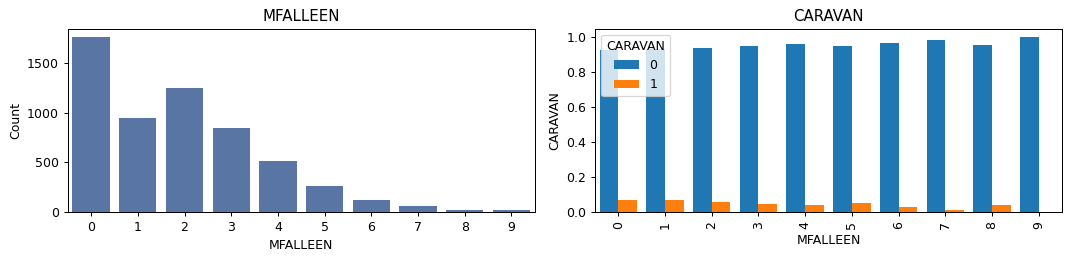

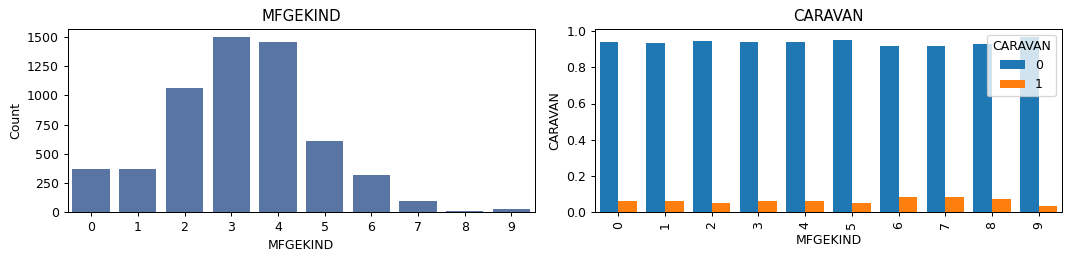

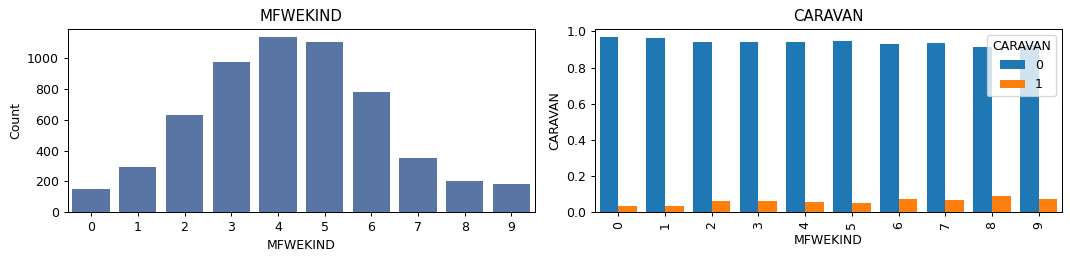

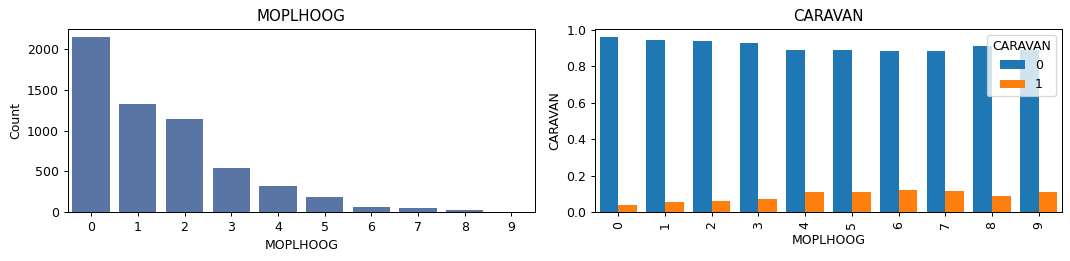

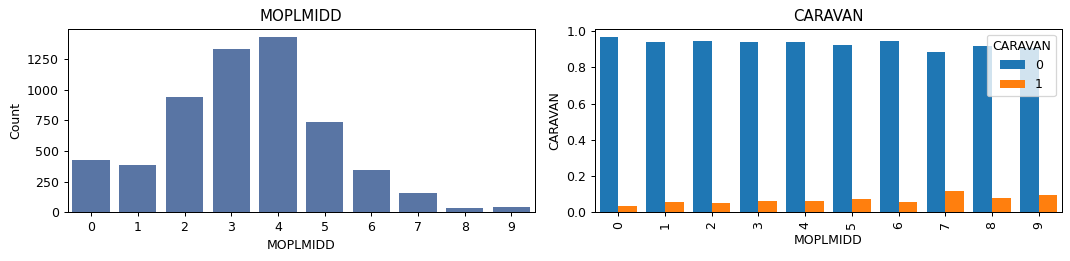

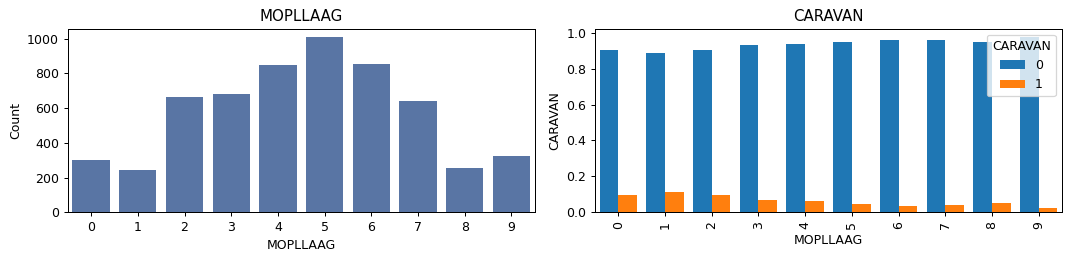

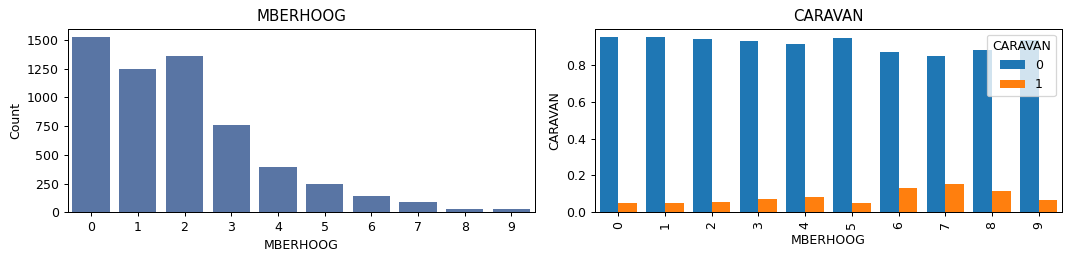

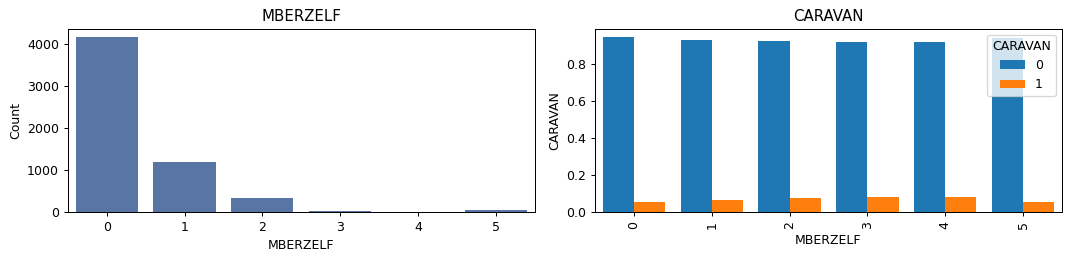

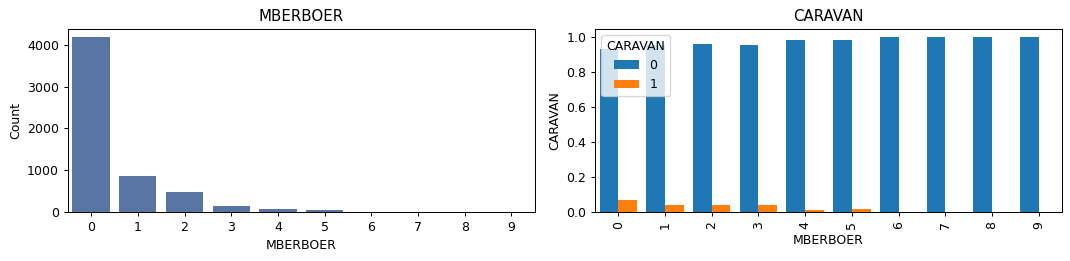

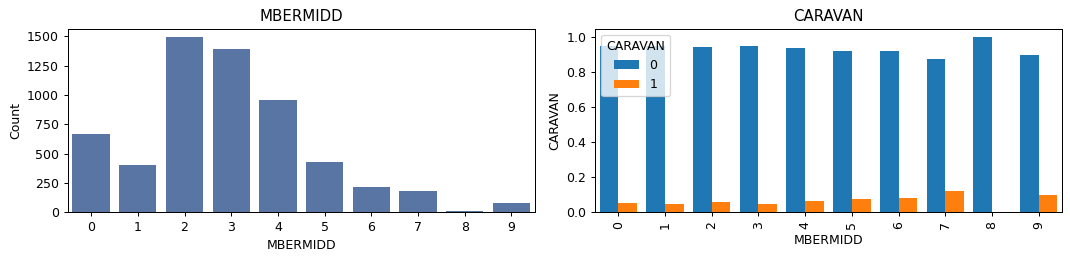

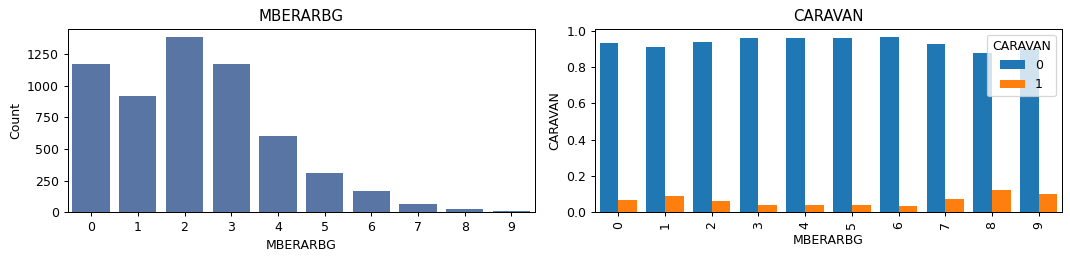

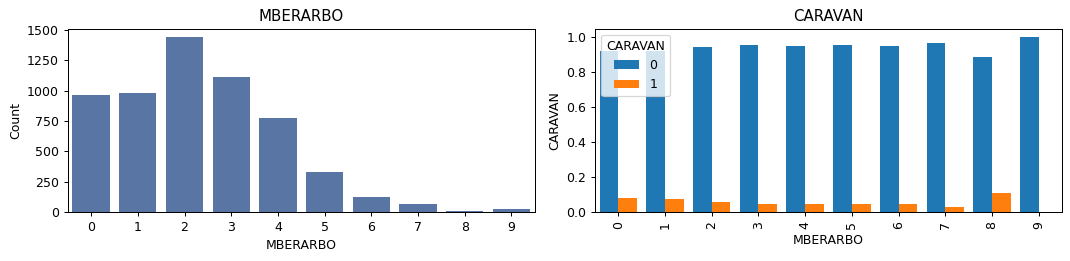

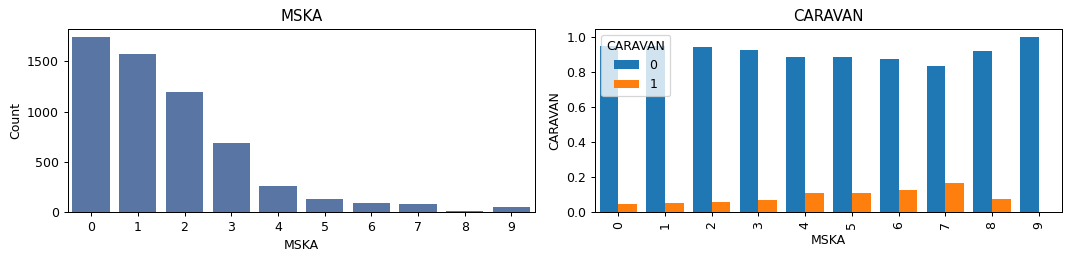

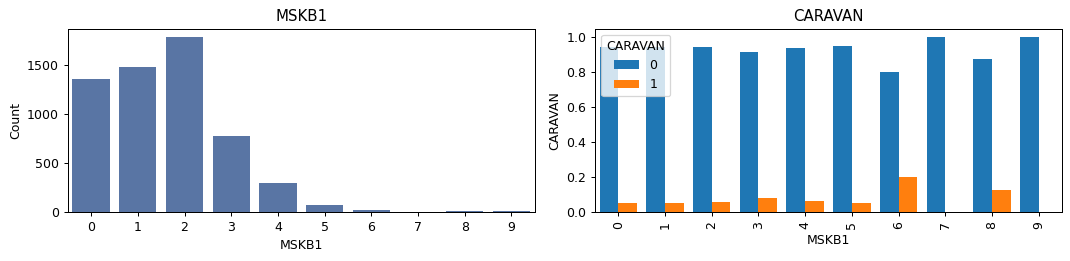

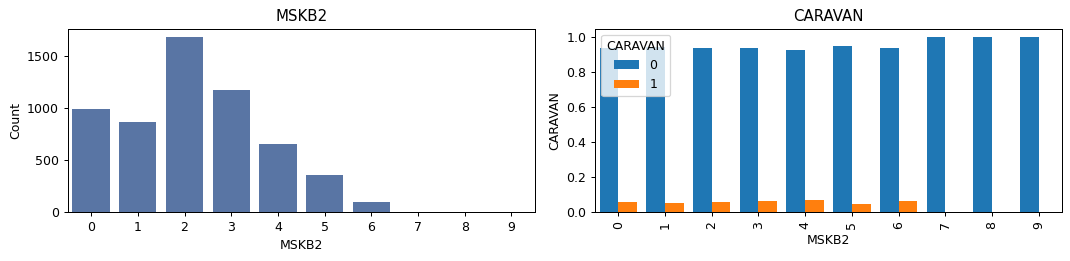

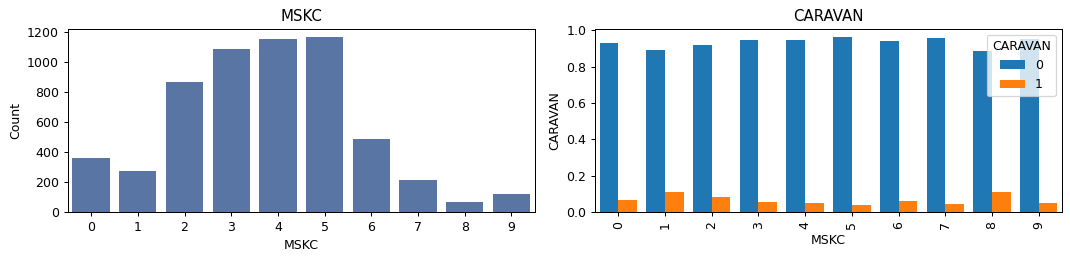

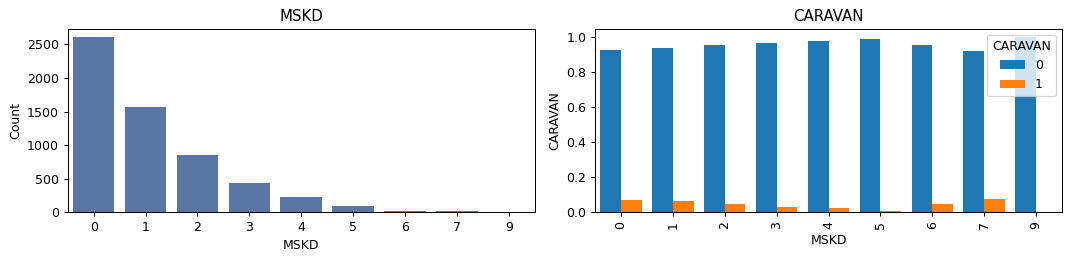

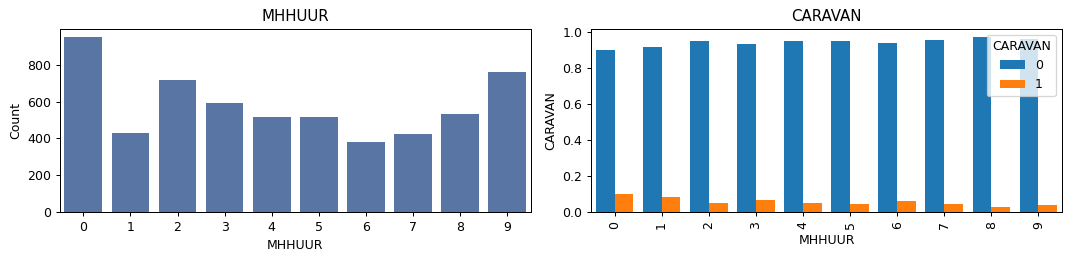

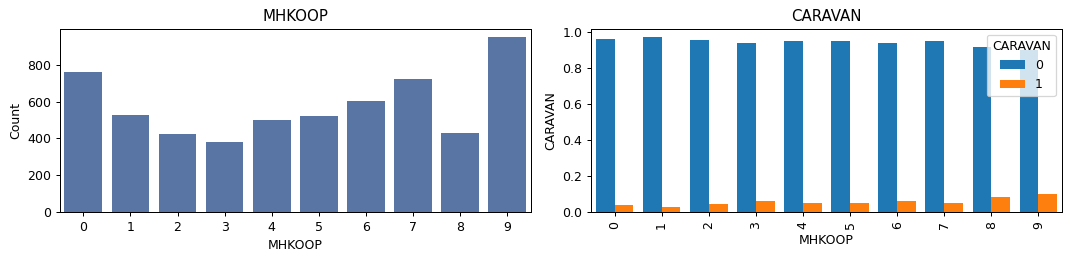

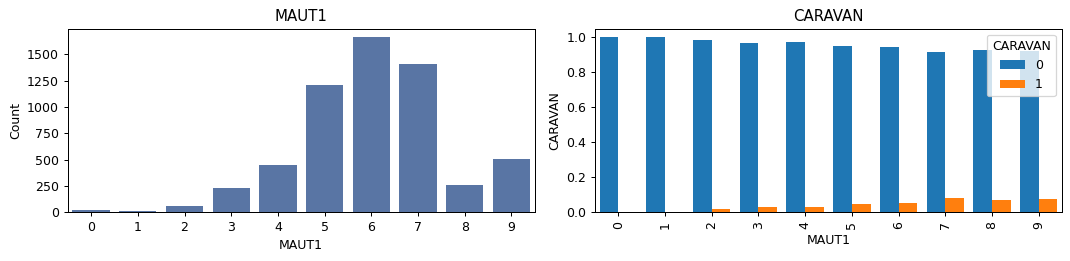

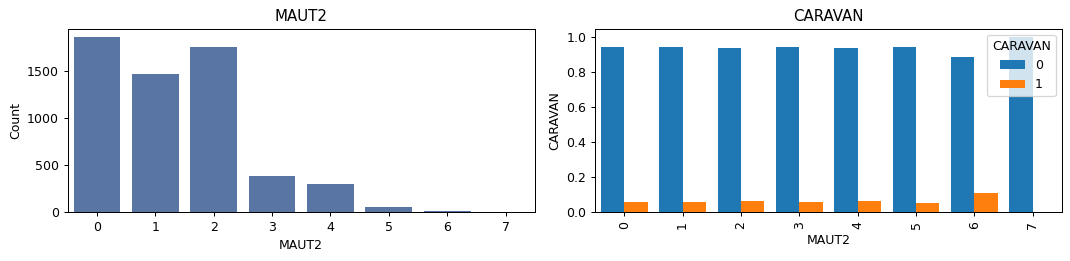

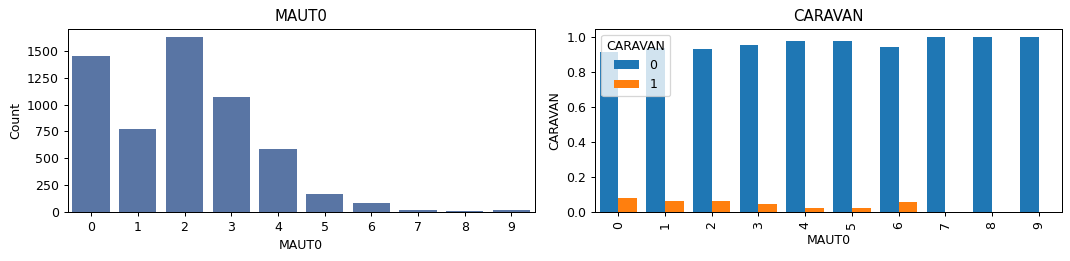

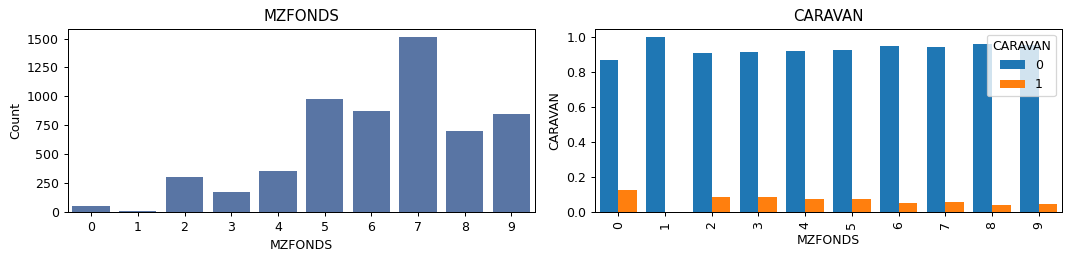

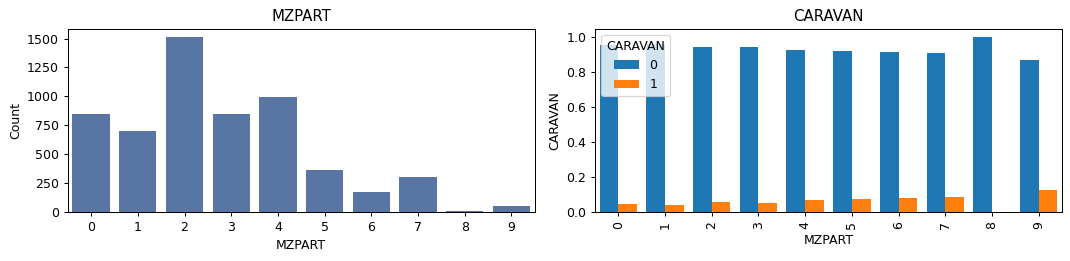

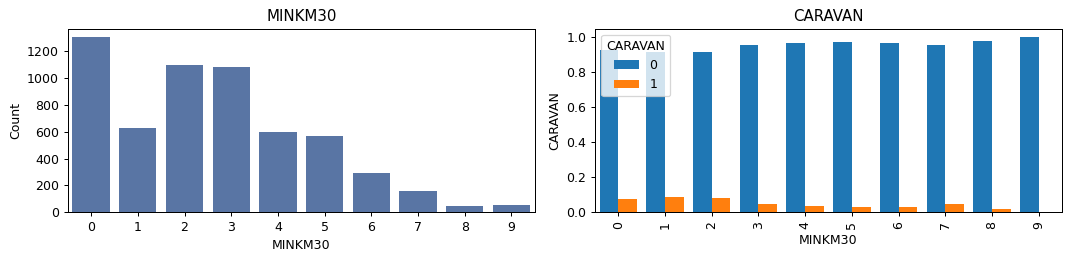

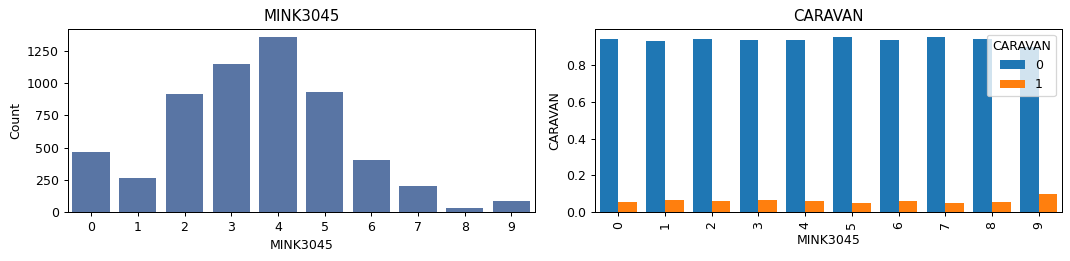

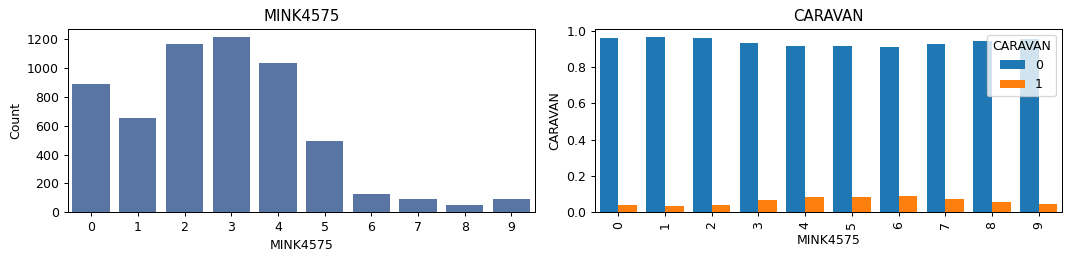

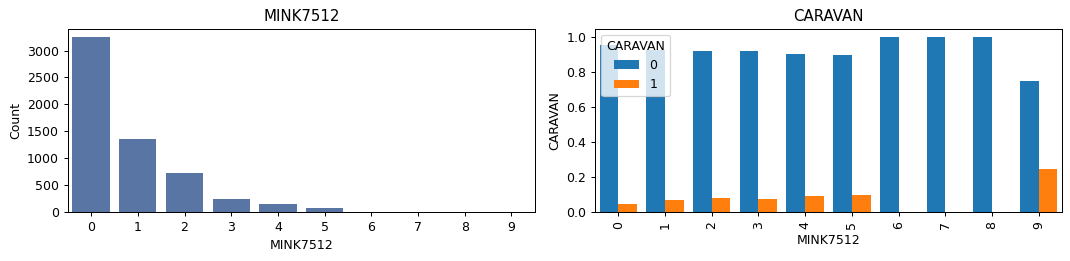

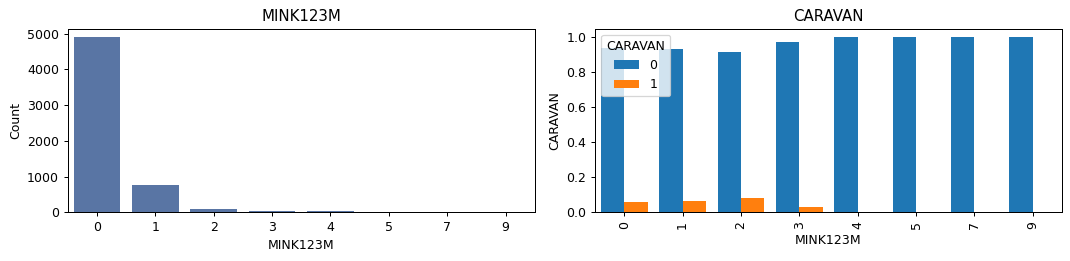

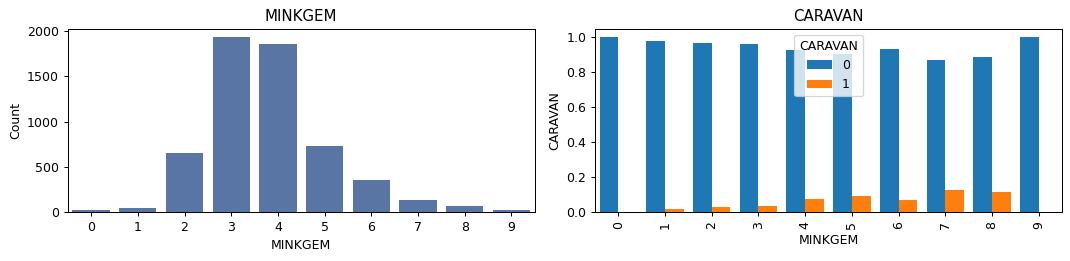

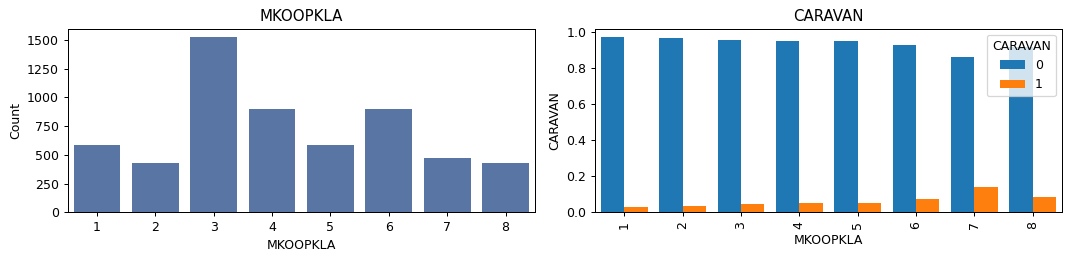

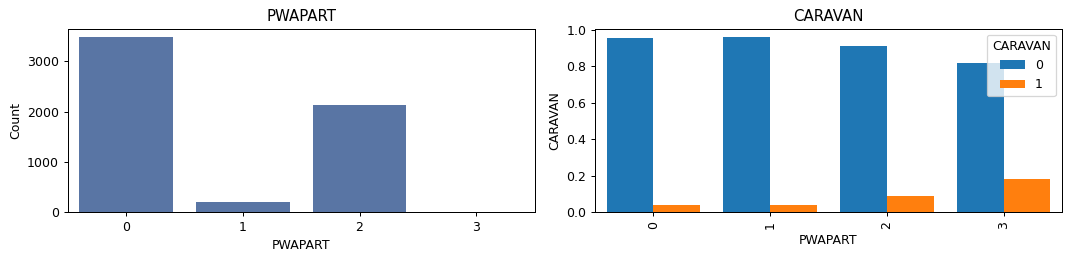

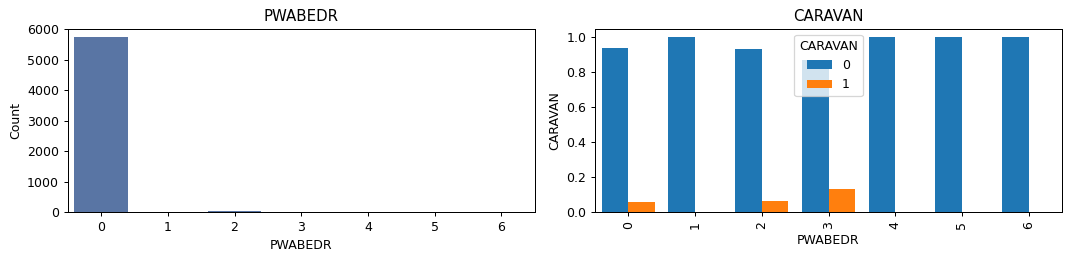

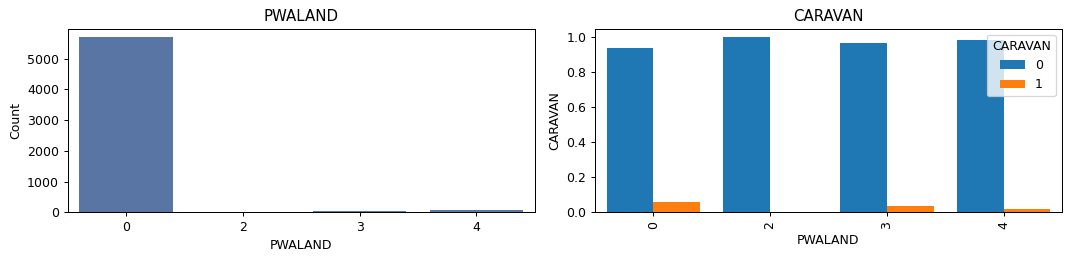

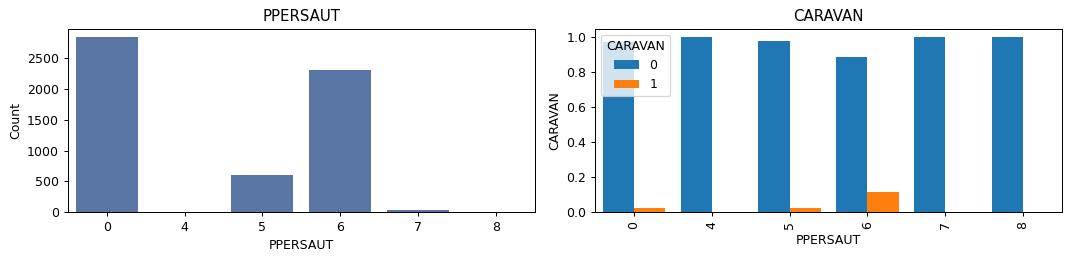

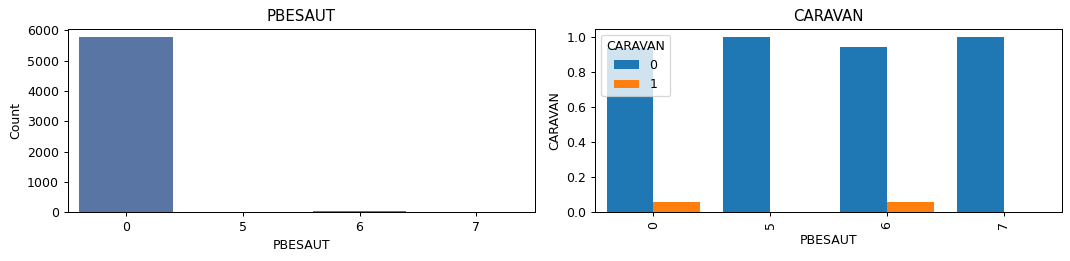

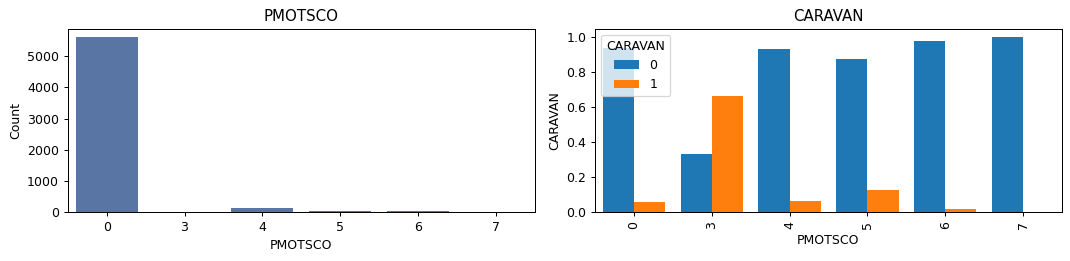

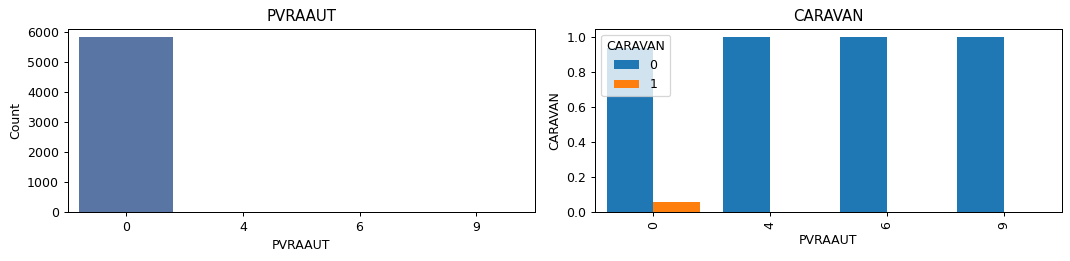

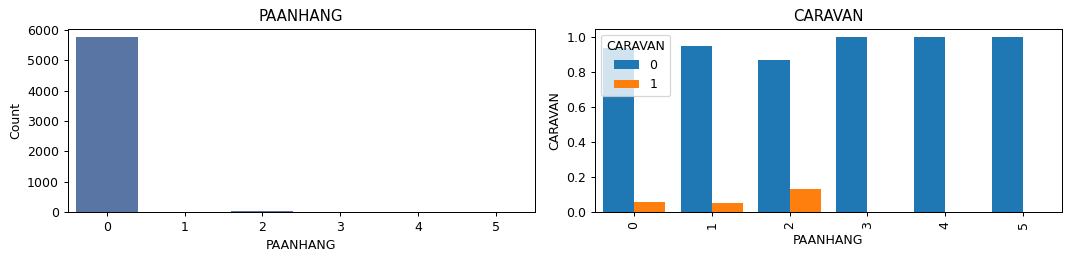

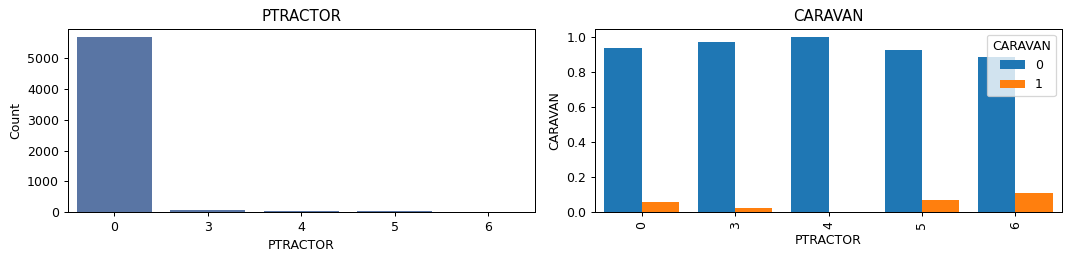

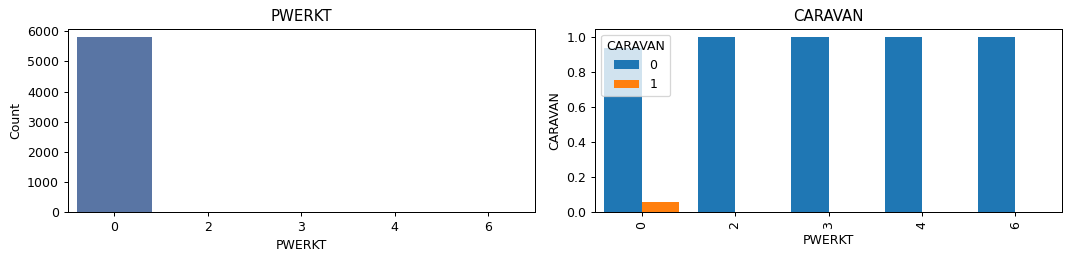

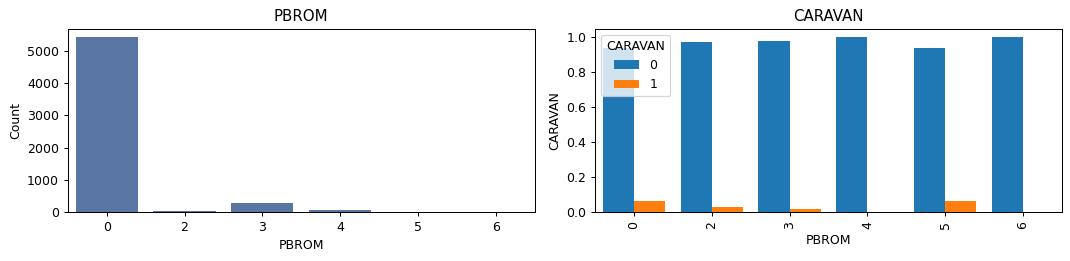

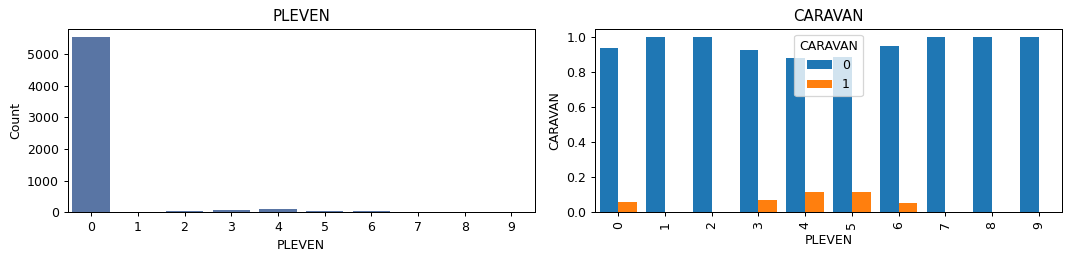

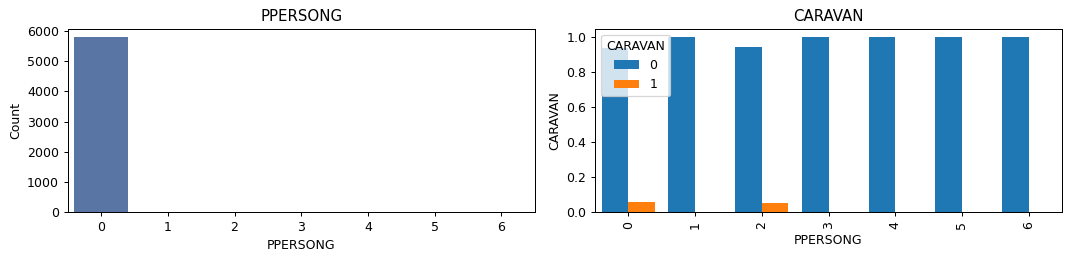

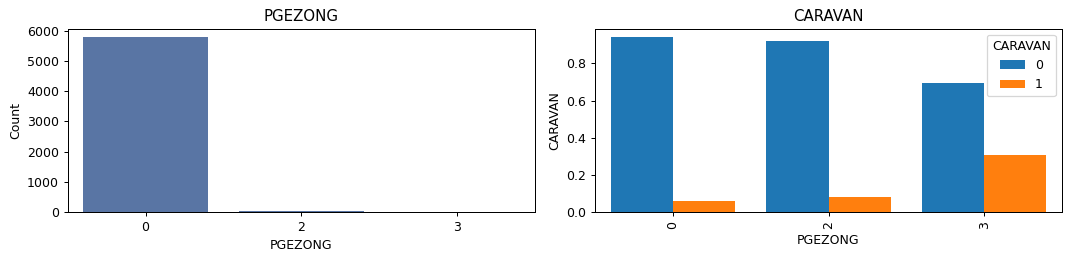

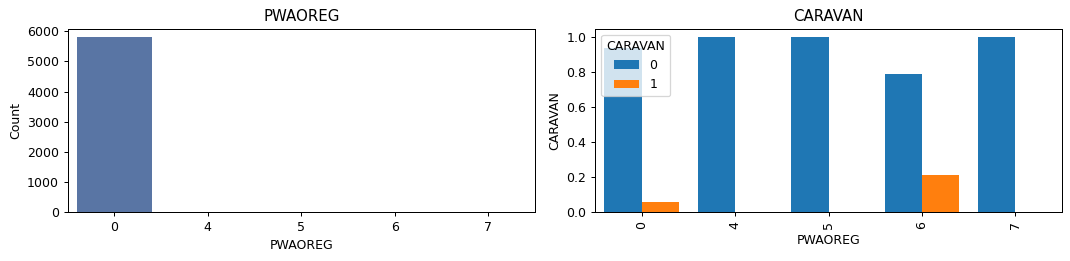

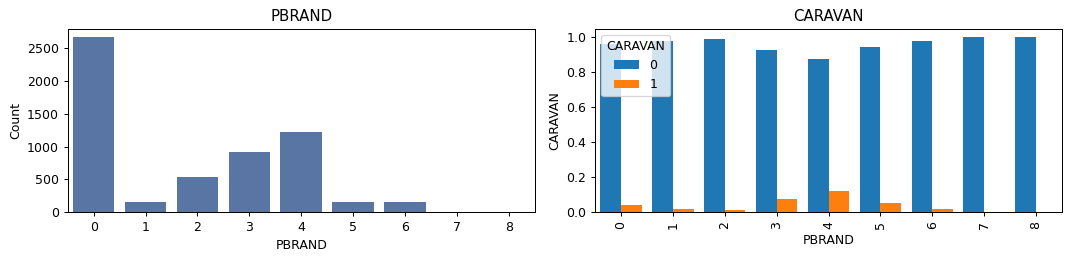

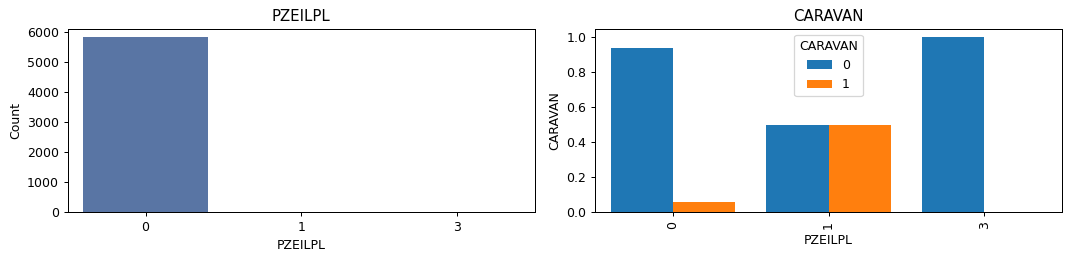

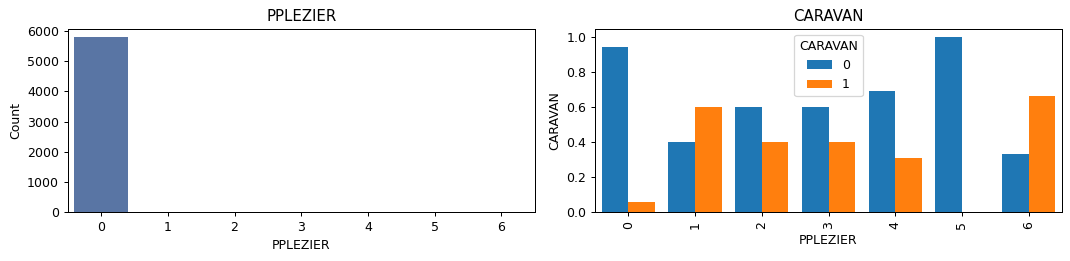

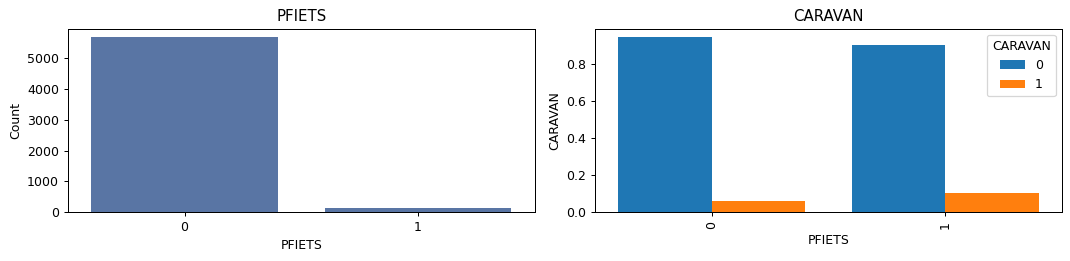

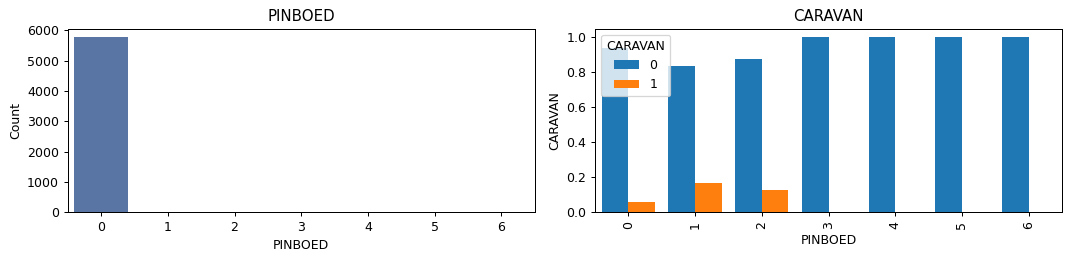

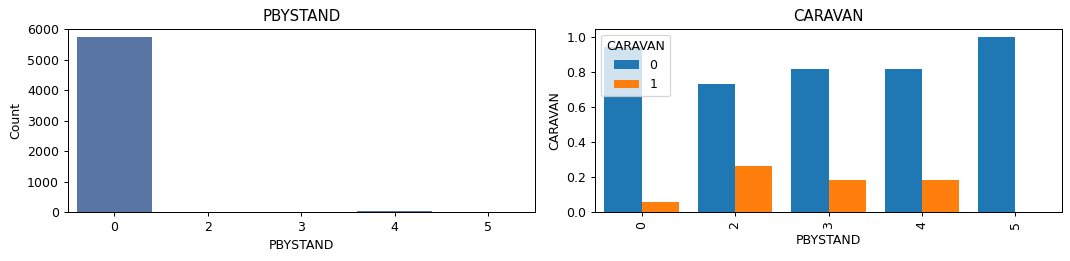

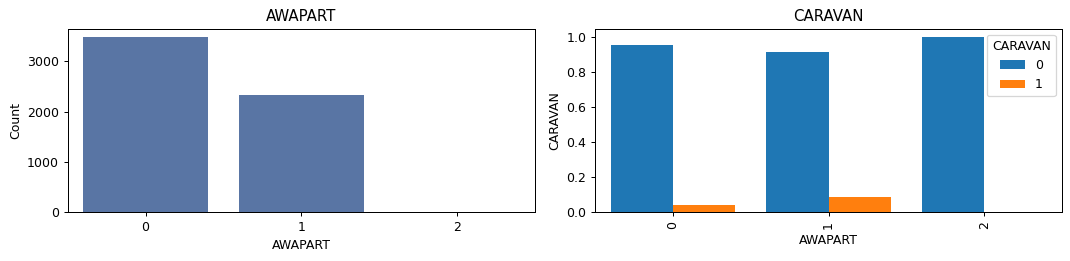

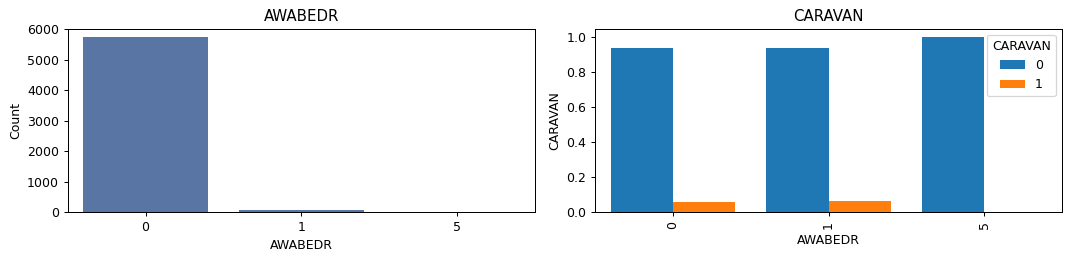

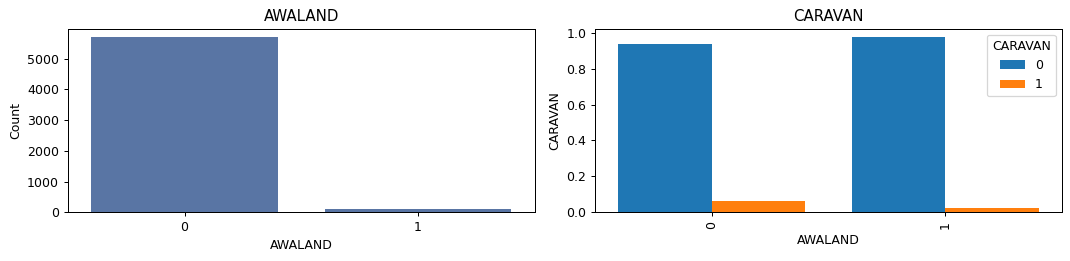

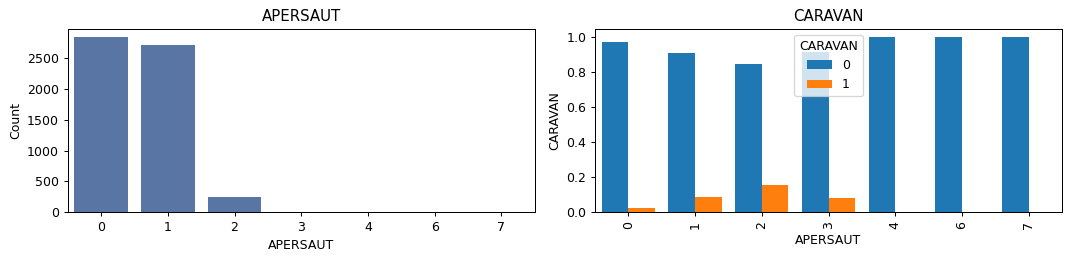

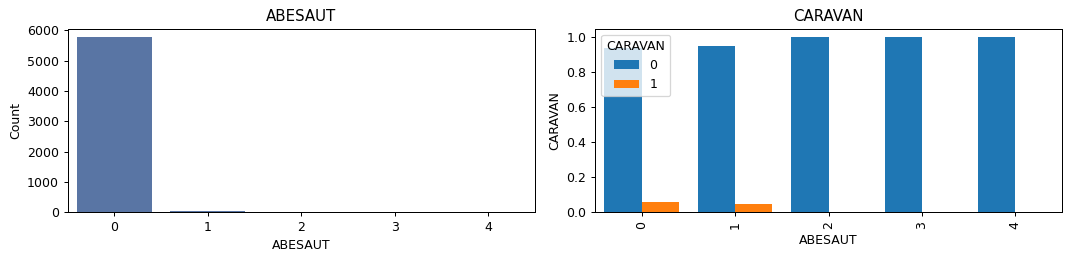

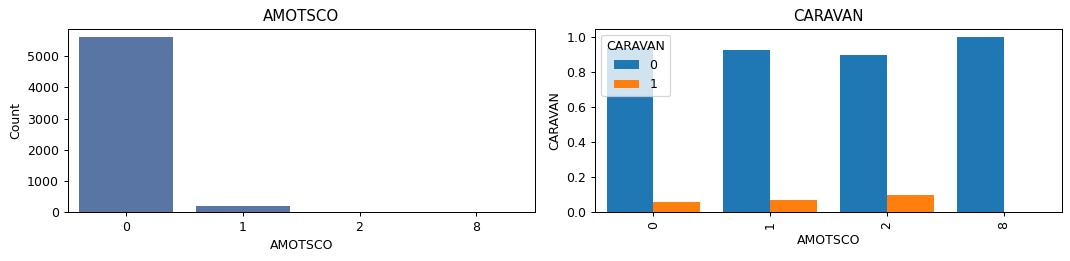

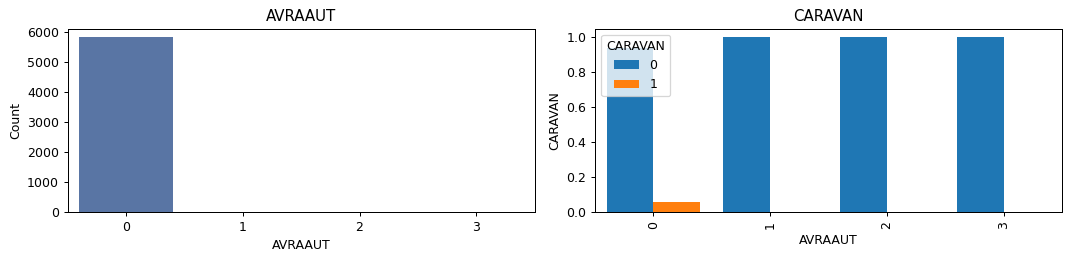

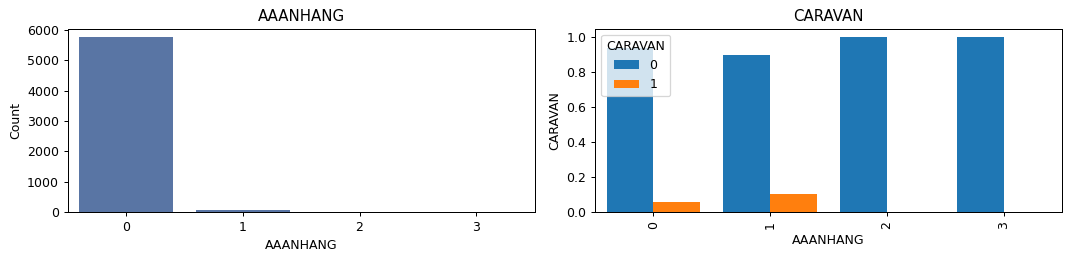

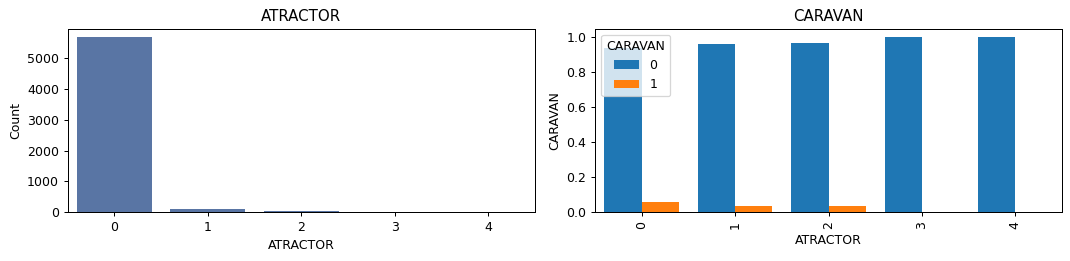

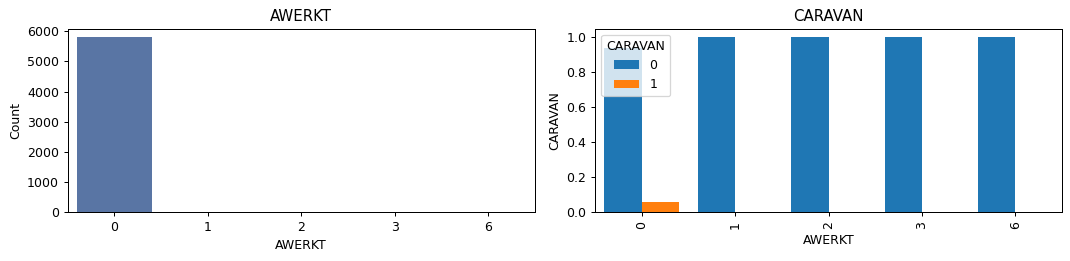

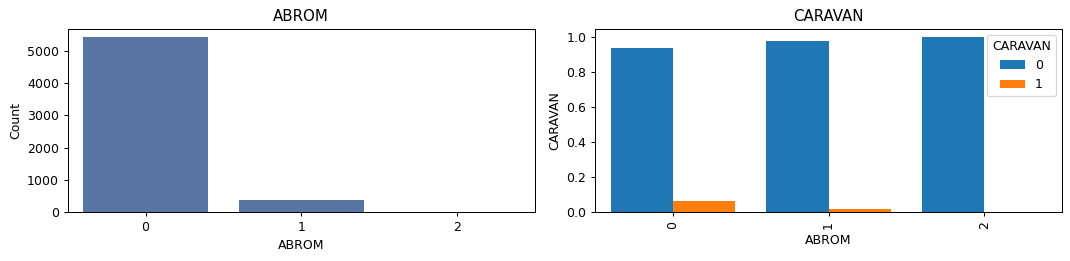

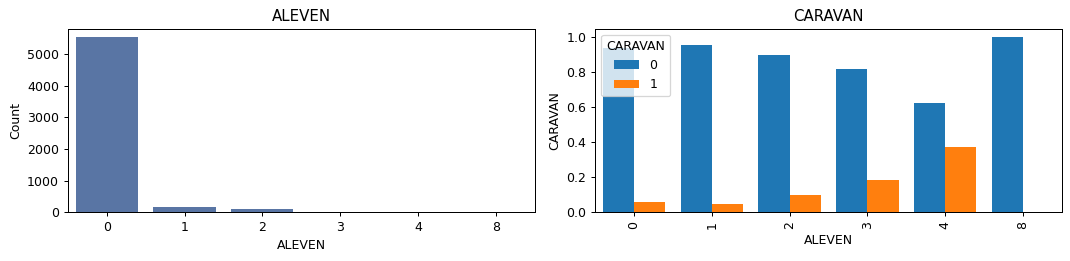

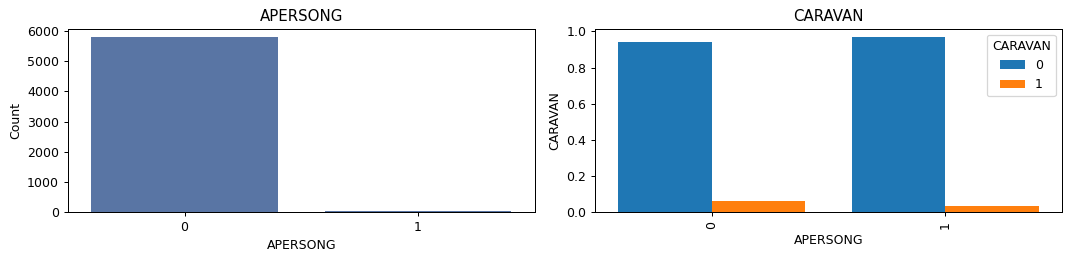

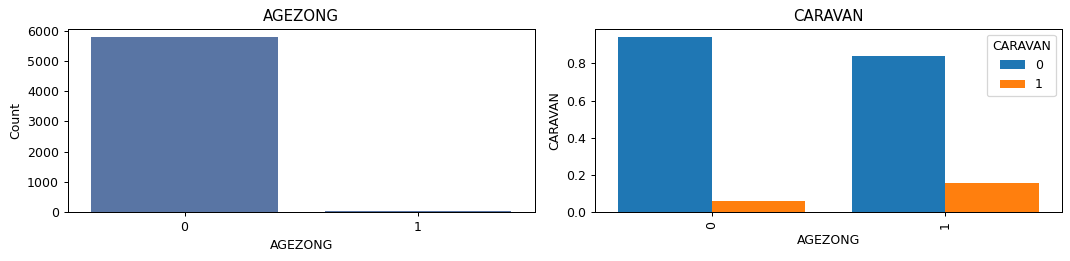

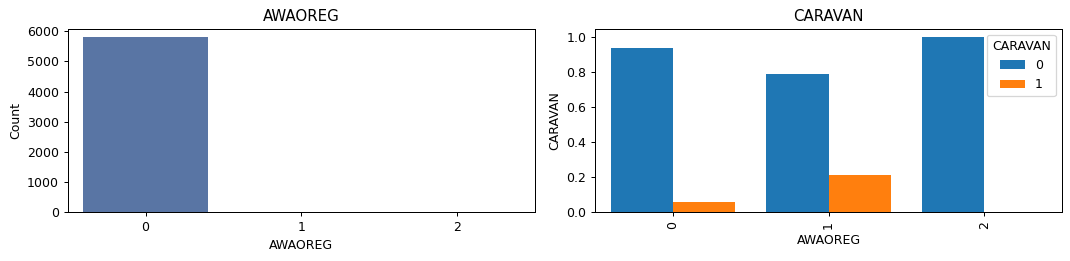

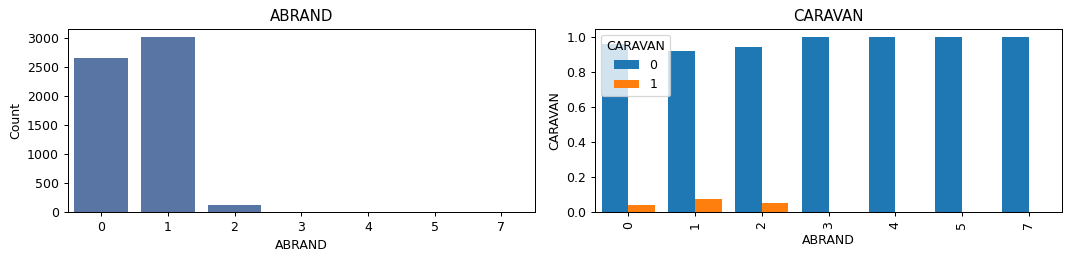

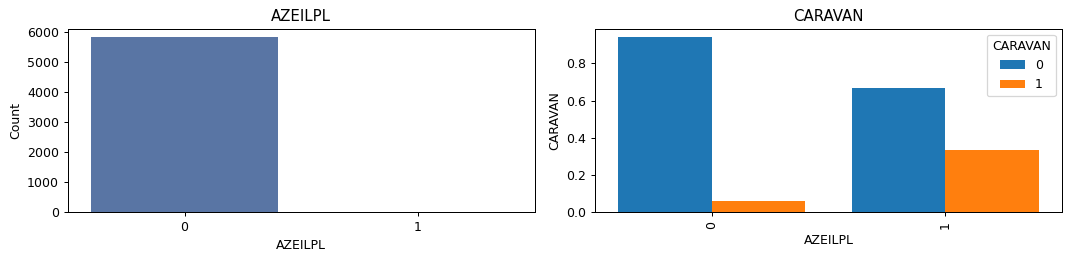

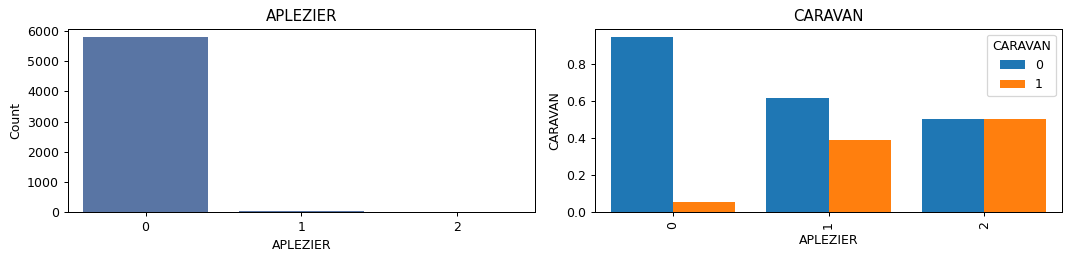

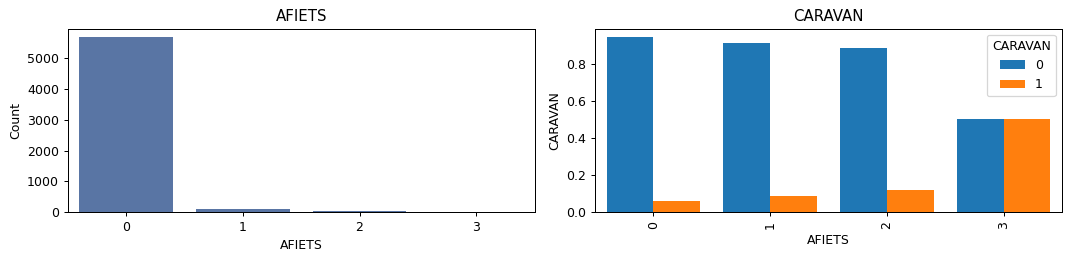

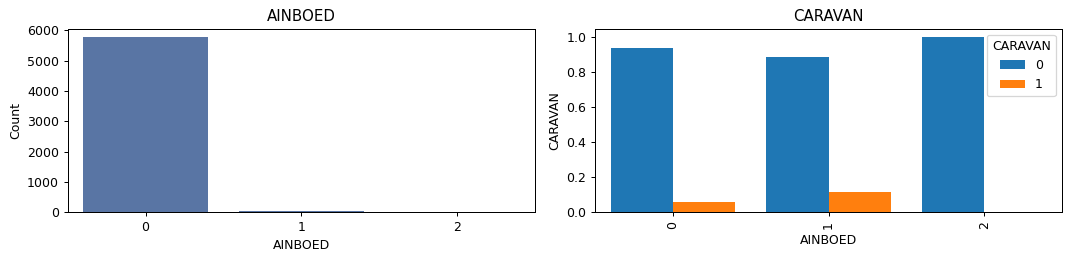

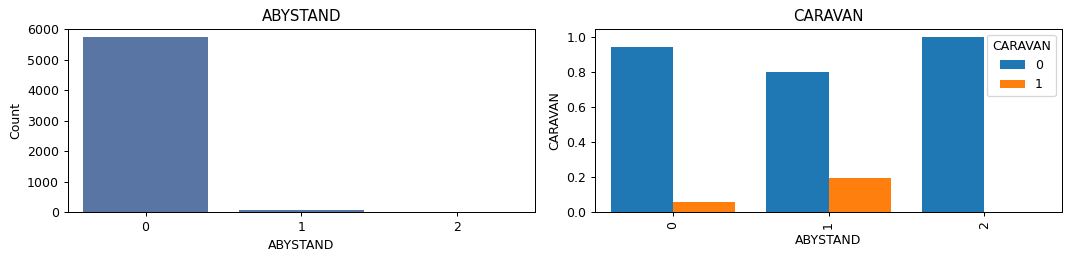

In [19]:
#Distribución de las variables
warnings.filterwarnings('ignore')
for i in list(traindata.columns):
    if (traindata[i].dtype==int) & (i!='CARAVAN'):
        plot_feature(traindata, col_name=i, isContinuous=True, target='CARAVAN')
    elif  i!='CARAVAN':
        plot_feature(traindata, col_name=i, isContinuous=False, target='CARAVAN')
#Con los gráficos de la izquienda veo como se comporta cada variable individualmente y con los de la derecha comparo
#cada variable con la variable objetivo

### Tratamiento de variables continuas

En este análisis he decidido no analizar los outliers porque son importantes para el análisis y no se deben eliminar, ya que pueden ser útiles para predecir quien va a comprar un seguro de autocaravanas

In [20]:
#Recojo las variables numéricas para analizarlas
list_var_continuous = ['MAANTHUI','MGEMOMV','AWAPART','AWABEDR','AWALAND','APERSAUT','ABESAUT','AMOTSCO','AVRAAUT','AAANHANG',
                       'ATRACTOR','AWERKT','ABROM','ALEVEN','APERSONG','AGEZONG','AWAOREG','ABRAND','AZEILPL','APLEZIER',
                       'AFIETS','AINBOED','ABYSTAND', 'CARAVAN']

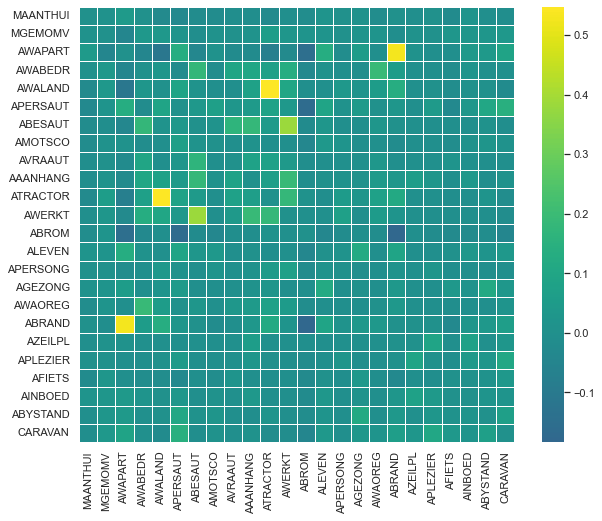

0

In [21]:
#observo las correlaciones entre variables
get_corr_matrix(dataset = traindata[list_var_continuous], 
                metodo='pearson', size_figure=[10,8])

In [22]:
#Veo la correlación
corr = traindata[list_var_continuous].corr('pearson')
new_corr = corr.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1)
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)
new_corr[new_corr['correlation']>0.3]

level_0  level_1  correlation
244  ATRACTOR  AWALAND     0.547175
410    ABRAND  AWAPART     0.525261
270    AWERKT  ABESAUT     0.379082

Hay asociación mediana y moderada entre distintas variables numéricas

### Tratamiento de variables categóricas

In [23]:
#Recojo las variables categóricas
list_var_cat = ['MOSTYPE','MGEMLEEF','MOSHOOFD','MGODRK','MGODPR','MGODOV','MGODGE','MRELGE','MRELSA','MRELOV',
             'MFALLEEN','MFGEKIND','MFWEKIND','MOPLHOOG','MOPLMIDD','MOPLLAAG','MBERHOOG','MBERZELF','MBERBOER','MBERMIDD',
             'MBERARBG','MBERARBO','MSKA','MSKB1','MSKB2','MSKC','MSKD','MHHUUR','MHKOOP','MAUT1','MAUT2','MAUT0','MZFONDS',
             'MZPART','MINKM30','MINK3045','MINK4575','MINK7512','MINK123M','MINKGEM','MKOOPKLA','PWAPART','PWABEDR','PWALAND',
             'PPERSAUT','PBESAUT','PMOTSCO','PVRAAUT','PAANHANG','PTRACTOR','PWERKT','PBROM','PLEVEN','PPERSONG','PGEZONG',
             'PWAOREG','PBRAND','PZEILPL','PPLEZIER','PFIETS','PINBOED','PBYSTAND','CARAVAN']

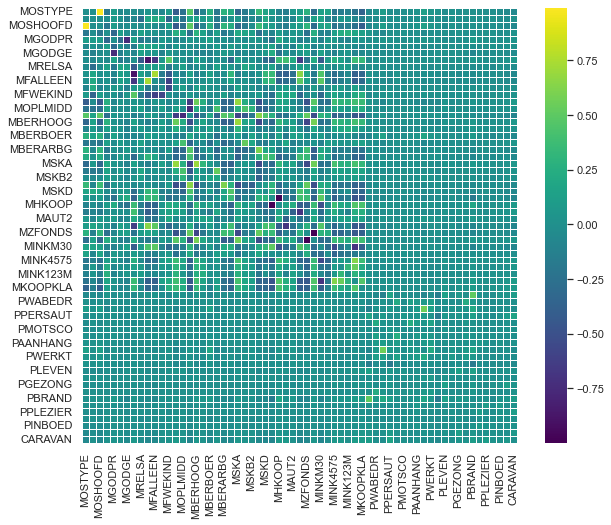

0

In [24]:
get_corr_matrix(dataset = traindata[list_var_cat], 
                metodo='spearman', size_figure=[10,8])

Para analizar las variables categóricas utilizo la correlación de spearman. Además, anteriormente he analizado la distribución de todas las variables incluidas las categóricas